In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [579]:
rnaseq = pd.read_csv("geo/hts-geo-series-human.csv")
rnaseq["Capture Type"] = "RNA-Seq"
microarray = pd.read_csv("geo/array-geo-series-human.csv")
microarray["Capture Type"] = "MicroArray"

In [580]:
d = microarray.append(rnaseq)

In [581]:
d["Release Date"] = pd.to_datetime(d["Release Date"])
d["Year"] = d["Release Date"].dt.year

In [582]:
d = d[d["Year"] > 2001]
d = d[d["Year"] < 2018]

In [583]:
#d = d[d["Sample Count"] < 500]

In [584]:
d["Title"] = d["Title"].str.lower()
singlecell = d["Title"].str.contains("single-cell")
singlecell |= d["Title"].str.contains("single cell")
singlecell.sum()

195

In [585]:
d["Isolation"] = ["Single Cell" if x else "Multi Cell" for x in singlecell]

In [586]:
dsc = d[singlecell]
dmc = d[singlecell == False]

In [587]:
# dmc["Sample Count"].max()

In [588]:
# np.where(dmc["Sample Count"] == 878)

In [589]:
# dmc.iloc[1189]

In [597]:
r = dmc.groupby(["Year", "Capture Type"])["Sample Count"].median().unstack("Capture Type")
r

Capture Type,MicroArray,RNA-Seq
Year,,
2002,5.0,NaN
2003,7.0,NaN
2004,18.0,NaN
2005,20.0,NaN
2006,19.0,NaN
2007,17.0,NaN
2008,15.0,18.0
2009,16.0,4.0
2010,15.0,14.0


In [598]:
#r = d.groupby([d["Release Date"].dt.year, "capture"])["Sample Count"].mean()

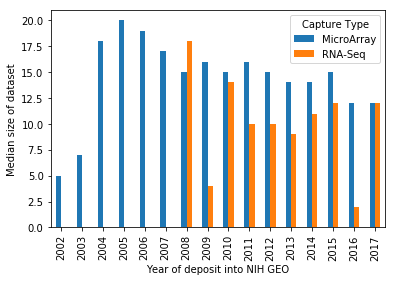

In [599]:
ax = r.plot.bar();
ax.set_ylabel("Median size of dataset");
ax.set_xlabel("Year of deposit into NIH GEO");

In [593]:
r = dmc.groupby(["Year", "Capture Type"])["Sample Count"].count().unstack("Capture Type")
r

Capture Type,MicroArray,RNA-Seq
Year,,
2002,27.0,NaN
2003,178.0,NaN
2004,250.0,NaN
2005,399.0,NaN
2006,522.0,NaN
2007,687.0,NaN
2008,935.0,6.0
2009,1185.0,7.0
2010,1471.0,37.0


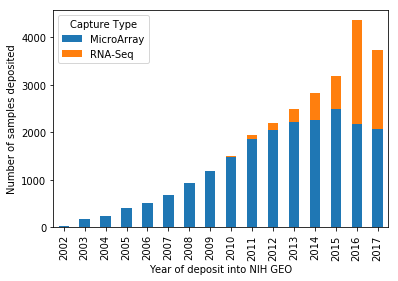

In [594]:
ax = r.plot.bar(stacked=True);
ax.set_ylabel("Number of samples deposited");
ax.set_xlabel("Year of deposit into NIH GEO");

In [595]:
r = dmc.groupby(["Year", "Capture Type"])["Sample Count"].sum().unstack("Capture Type")
r

Capture Type,MicroArray,RNA-Seq
Year,,
2002,639.0,NaN
2003,3665.0,NaN
2004,8703.0,NaN
2005,17357.0,NaN
2006,23614.0,NaN
2007,28743.0,NaN
2008,37238.0,191.0
2009,51119.0,1453.0
2010,65338.0,1792.0


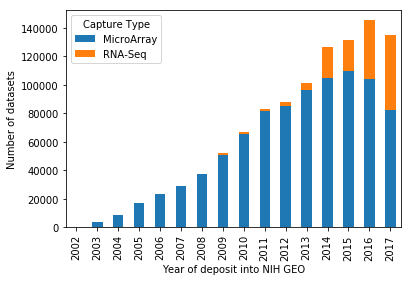

In [596]:
ax = r.plot.bar(stacked=True);
ax.set_ylabel("Number of datasets");
ax.set_xlabel("Year of deposit into NIH GEO");

In [403]:
# d.groupby(d["Release Date"].dt.year)["Sample Count"].mean().plot.bar(color="blue")

In [341]:
stats = d.groupby(d["Release Date"].dt.year)["Sample Count"].count()

In [342]:
stats.index

Int64Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name=u'Release Date')

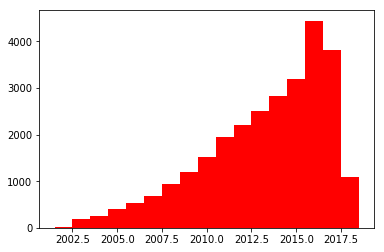

In [343]:
rects2 = plt.bar(stats.index, stats.as_matrix(), 1, color='red')

In [75]:
#d = d[d.applymap(np.isscalar)["Sample Count"]]

In [77]:
#d["Sample Count"].max()

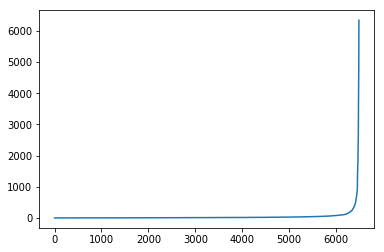

In [84]:
plt.plot(np.sort(d["Sample Count"]))

In [78]:
d["Sample Count"].mean()

42.57147262914418

In [89]:
d = pd.read_csv("geo/array-geo-series-human.csv")

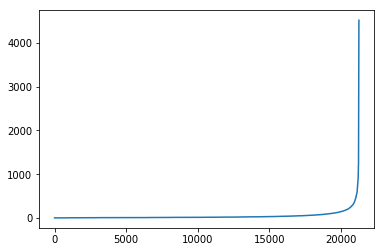

In [90]:
plt.plot(np.sort(d["Sample Count"]))

In [91]:
d["Sample Count"].mean()

43.39351742955262

In [92]:
d["Sample Count"].shape

(21257,)